## WELCOME TO DESICION TREES CASE STUDY

### LoanTap is an online platform committed to delivering customized loan products to millennials.
### They innovate in an otherwise dull loan segment, to deliver instant,
### flexible loans on consumer friendly terms to salaried professionals and businessmen.

## Problem Statement:
### Given a set of attributes for an Individual, determine if a credit line should be extended to them.
### If so, what should the repayment terms be in business recommendations? 
                                           
## Data Description:
### 1. loan_amnt : The listed amount of the loan applied for by the borrower.
### 2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
### 3. int_rate : Interest Rate on the loan
### 4. installment : The monthly payment owed by the borrower if the loan originates.
### 5. grade : LoanTap assigned loan grade
### 6. sub_grade : LoanTap assigned loan subgrade
### 7. emp_title :The job title supplied by the Borrower when applying for the loan.
### 8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
### 9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
### 10. annual_inc : The self-reported annual income provided by the borrower during registration.
### 11. verification_status : Indicates if income was verified by LoanTap or not
### 12. issue_d : The month which the loan was funded
### 13. loan_status : Current status of the loan - Target Variable
### 14. purpose : A category for the loan request.
### 15. title : The loan title provided by the borrower
### 16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations
### 17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
### 18. open_acc : The number of open credit lines in the borrower's credit file.
### 19. pub_rec : Number of derogatory public records
### 20. revol_bal : Total credit revolving balance
### 21. revol_util : the amount of credit the borrower is using relative to all available revolving credit
### 22. total_acc : The total number of credit lines currently in the borrower's credit file
### 23. initial_list_status : The initial listing status of the loan
### 24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
### 25. mort_acc : Number of mortgage accounts.
### 26. pub_rec_bankruptcies : Number of public record bankruptcies
### 27. Address: Address of the individual

# * Tasks:
### 1. Define problem statement and perform Exploratory Data Analysis (20 points)
### a. Observations on shape of data and data types of all attributes
### b. Check for missing value (if any)
### c. Display the statistical summary
### d. Univariate Analysis and Bivariate Analysis of all the attributes

## Comments:
### a. On range of attributes
### b. Outliers of various attributes
### c. On the distribution of the variables and relationship between them


## 2. Data Preprocessing (30 Points)
### a. Duplicate value check
### b. Missing value treatment
### c. Outlier treatment
### d. Encoding categorical columns
### e. Check for imbalance dataset and balancing it
### f. Scaling

## 3. Model building (10 Points)
### a. Build the Logistic Regression model
### b. Display model coefficients with column names

## 4. Results Evaluation (40 Points)
### a. Confusion Matrix and comments (10 Points)
### b. Classification Report and comments (10 Points)
### c. AU-ROC Curve & comments (10 Points)
### d. Precision Recall Curve & comments (10 Points)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data  = pd.read_csv('loan_tap.csv')

In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Q 1. Define problem statement and perform Exploratory Data Analysis

In [8]:
# 1. Basic Information about the Dataset
print("Dataset Info:\n")
print(data.info())  # Column types and non-null counts

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null

In [9]:
print("\nSummary Statistics:\n")
print(data.describe())  # Numerical summary


Summary Statistics:

           loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000     

In [10]:
print("\nMissing Values:\n")
print(data.isnull().sum())  # Count of missing values per column


Missing Values:

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64



Target Variable Distribution:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


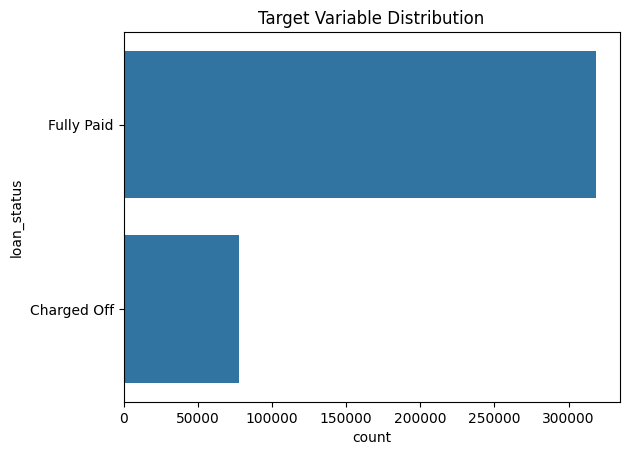

In [11]:
# 2. Distribution of the Target Variable
target_column = 'loan_status'  # Replace with your target column
print(f"\nTarget Variable Distribution:\n{data[target_column].value_counts()}")
sns.countplot(data[target_column])
plt.title("Target Variable Distribution")
plt.show()

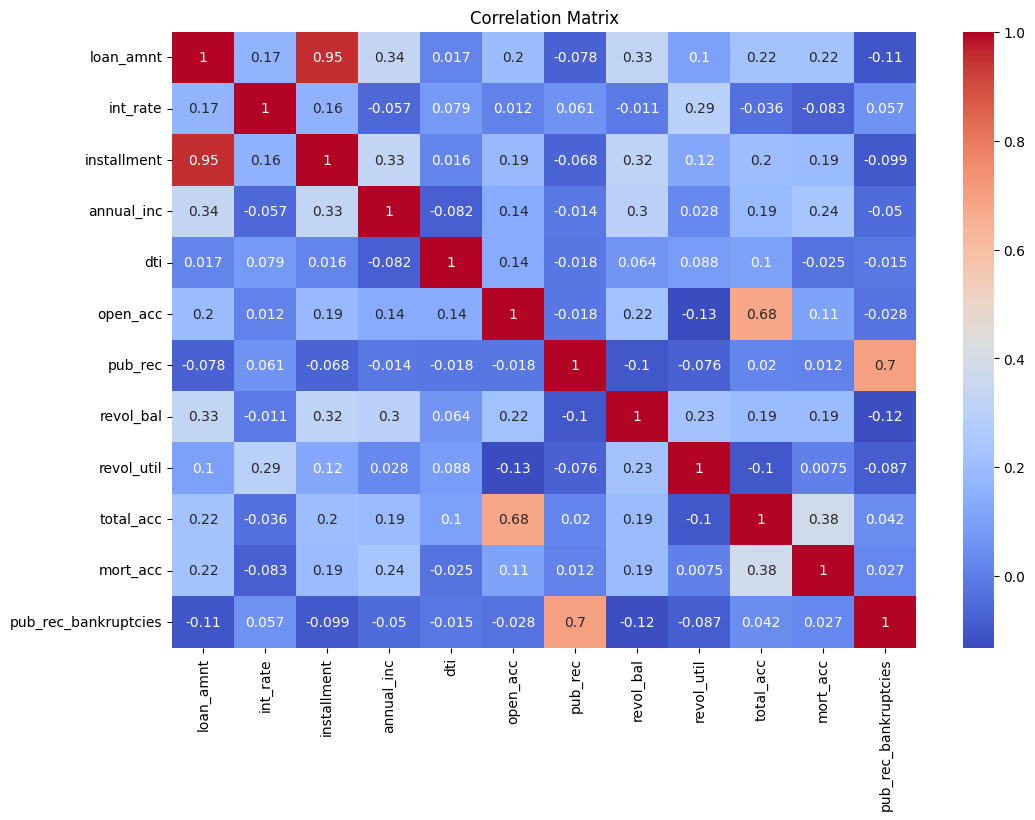

In [12]:
# 3. Correlation Analysis (Numerical Features)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

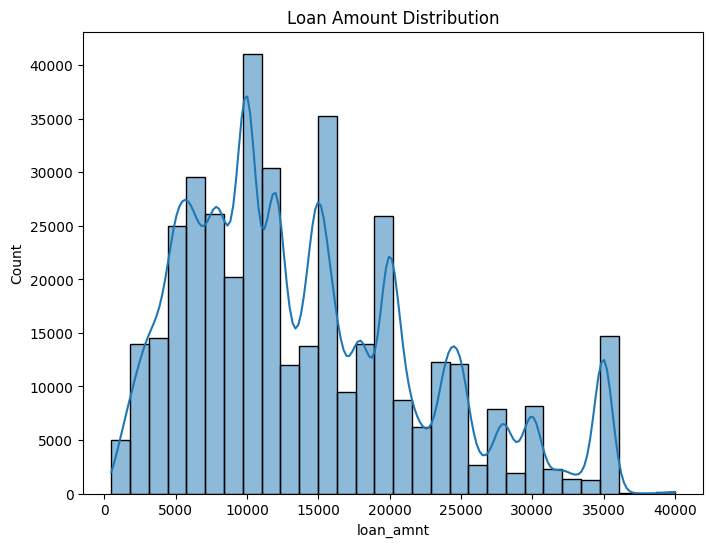

In [13]:
# 4. Univariate Analysis
# Example: Distribution of 'loan_amnt'
plt.figure(figsize=(8, 6))
sns.histplot(data['loan_amnt'], kde=True, bins=30)
plt.title("Loan Amount Distribution")
plt.show()

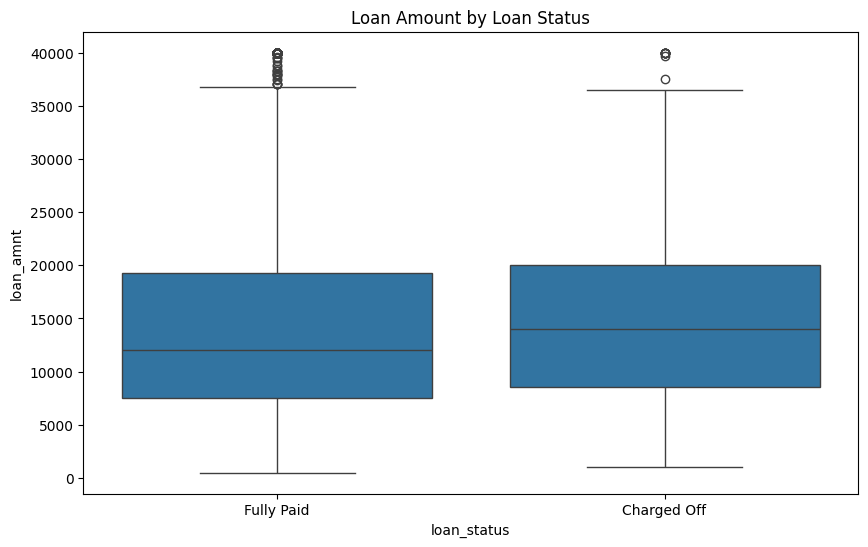

In [14]:
# 5. Bivariate Analysis
# Example: Loan Amount vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_column, y='loan_amnt', data=data)
plt.title("Loan Amount by Loan Status")
plt.show()

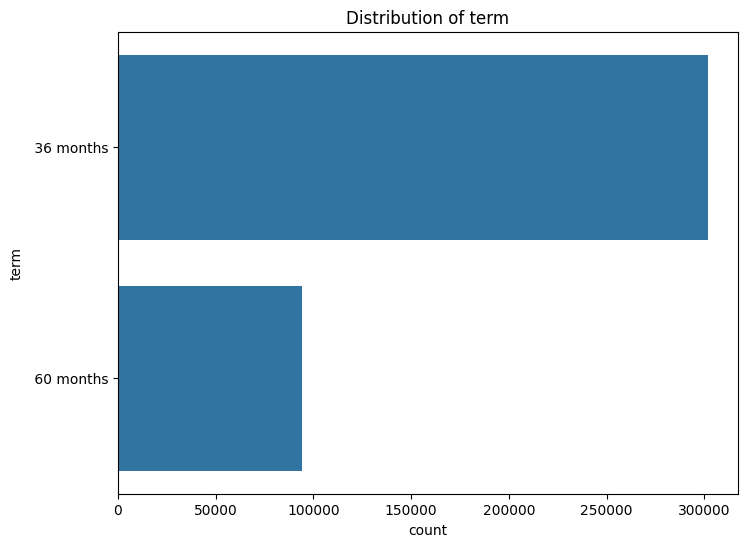

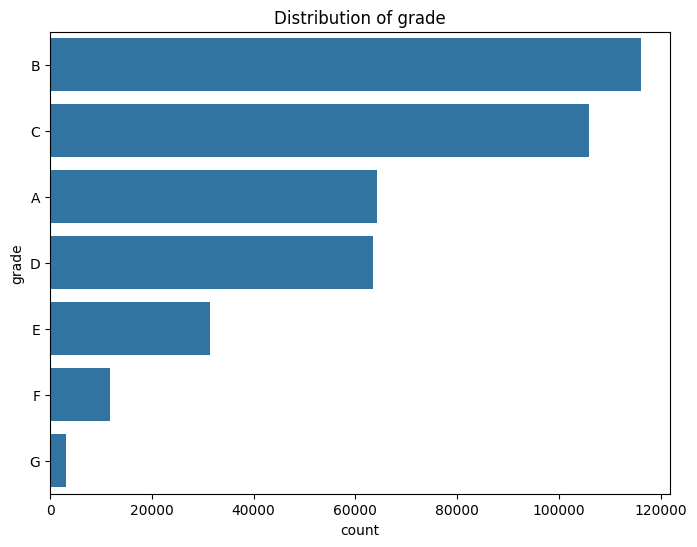

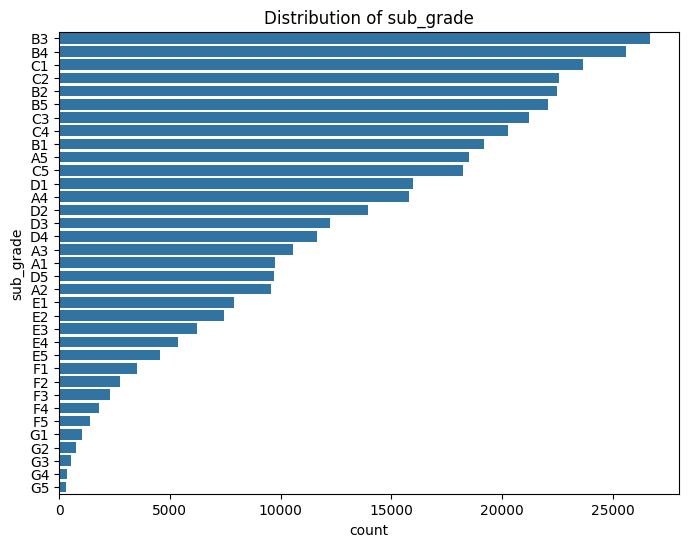

In [ ]:
# 6. Categorical Variable Analysis
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.show()

In [ ]:
# 7. Outlier Detection
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=data[numerical_columns])
# plt.title("Boxplot for Outlier Detection")
# plt.show()

## 2. Data Preprocessing (30 Points)

#### a. Duplicate value check

In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows


In [6]:
duplicate_count = duplicate_rows.shape[0]
duplicate_count

0

#### b. Missing value treatment

In [7]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [10]:
data["address"].mode()

0     USCGC Smith\r\nFPO AE 70466
1    USNS Johnson\r\nFPO AE 05113
2     USS Johnson\r\nFPO AE 48052
3       USS Smith\r\nFPO AP 70466
Name: address, dtype: object

In [48]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_8460\4181461318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_8460\4181461318.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [49]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

#### c. Outlier treatment

In [38]:
# selct all numerical columns for outlier treatment
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [27]:
# we are craeting a function to handle the outliers value in column 
def treat_outliers(df, columns):
    for column in columns:
        if df[column].dtype in ['int64', 'float64']:  
            Q1 = df[column].quantile(0.25)  
            Q3 = df[column].quantile(0.75)  
            IQR = Q3 - Q1  

            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Capping outliers
            df[column] = df[column].clip(lower=lower_bound, upper=upper_bound) 

Outliers have been treated.


In [ ]:
# function call / invoke the function(also we are passing the two paramenter, 1st is dataframe and parameter is num column)
treat_outliers(data, numerical_columns)

#### d. Encoding categorical columns